# Introduction
This notebook is intended to show a very basic example of the Anderson localization in one-dimensional system. 

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

# from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

26.189146544935 15.979975218507578


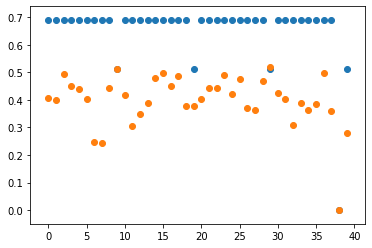

In [88]:
def IPA(vector):
    vector=vector/np.sum(abs(vector)**2);
    v1=abs(vector)**2;
    v1=v1**2;
    ipr=1.0/np.sum(v1)
    return(ipr)
def buildham(t,nq):
    nq=nq-1
    y=np.ones(nq)

    mat1=np.diag(y,-1)*t+np.diag(y,1)*t
    mat1[nq,0]=t
    mat1[0,nq]=t 

    #mat=np.kron(part1,mat1)+np.kron(part2,mat2)
    #print(mat)
    return(mat1)
ndim=40
nr=np.arange(0,ndim,1)
H0=buildham(1,ndim)
disorder=np.random.rand(ndim)-0.5;
d1=disorder**2;
H1=H0+np.diag(disorder)
[eigval0,eigvec0]=np.linalg.eigh(H0)
[eigval1,eigvec1]=np.linalg.eigh(H1)
#plt.scatter(nr,eigvec0[2,:])
#plt.scatter(disorder,d1)
#print(ndim)
ipa1=np.zeros(ndim)
ipa0=np.zeros(ndim)
for i in range(0,ndim-1):
    ipa1[i-1]=IPA(eigvec1[i,:])/ndim
    ipa0[i-1]=IPA(eigvec0[i,:])/ndim
plt.scatter(nr,ipa0)
plt.scatter(nr,ipa1)
print(sum(ipa0),sum(ipa1))